**Submitted by:** Poulami Ghosh and Muthukumar Pandaram

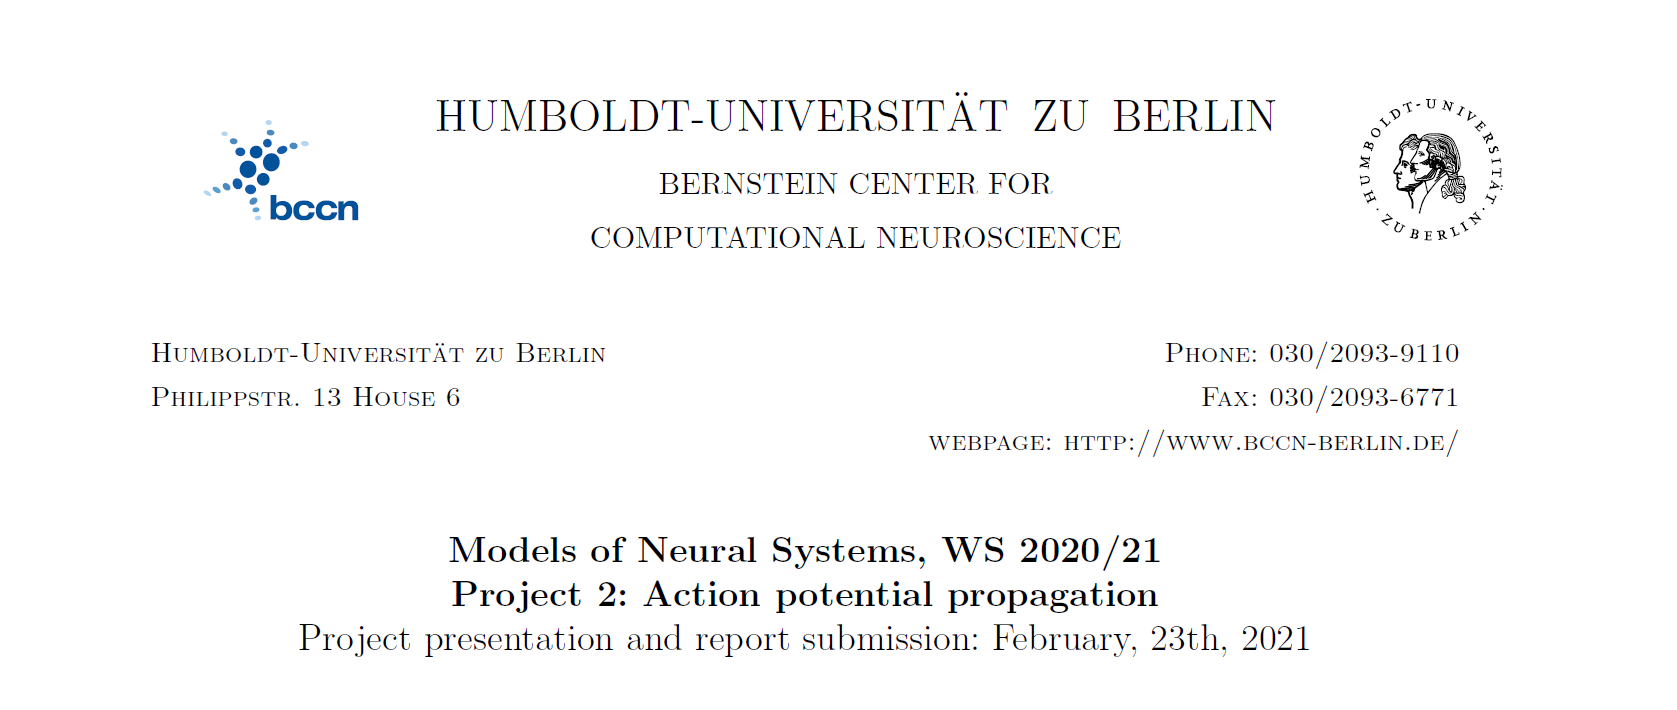

## UPDATE

We have got the coefficients initialised and logic for updating them. There are some errors in the code. We are currently working on getting setting up the numerical method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
def get_timeline(t_max, dt):
    return np.arange(0, t_max, dt)

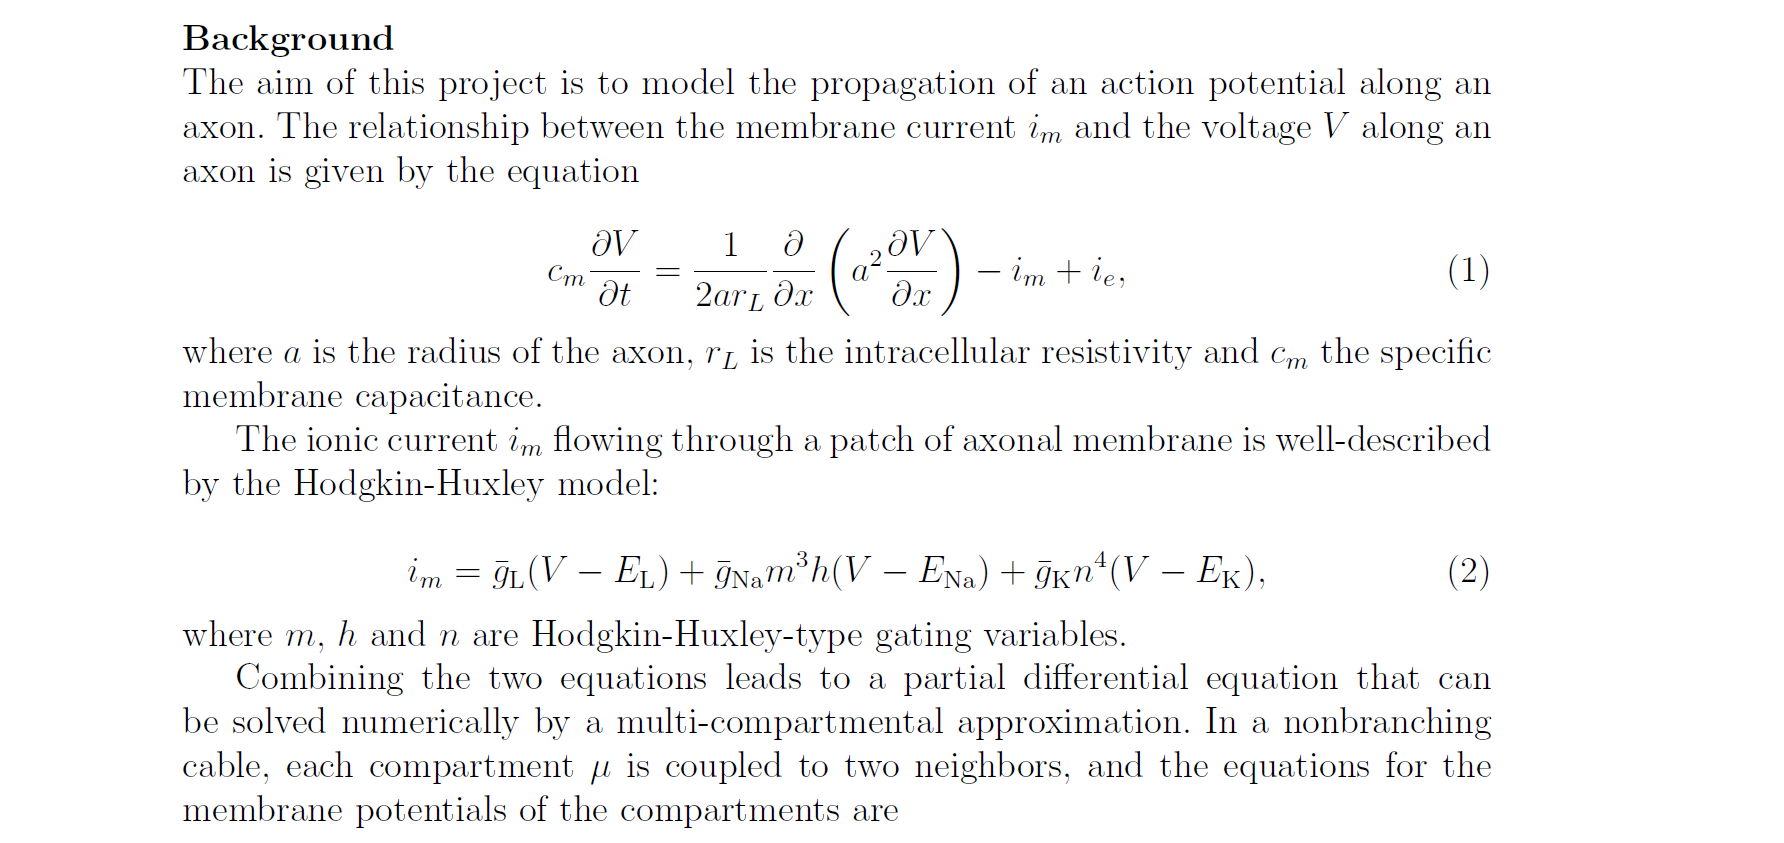

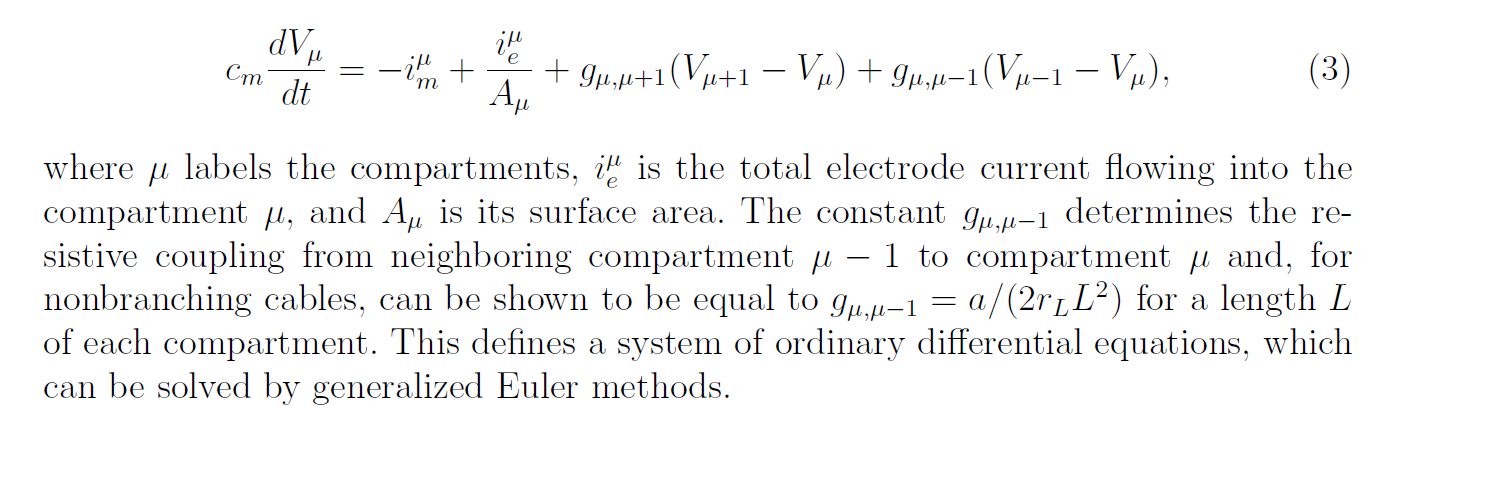

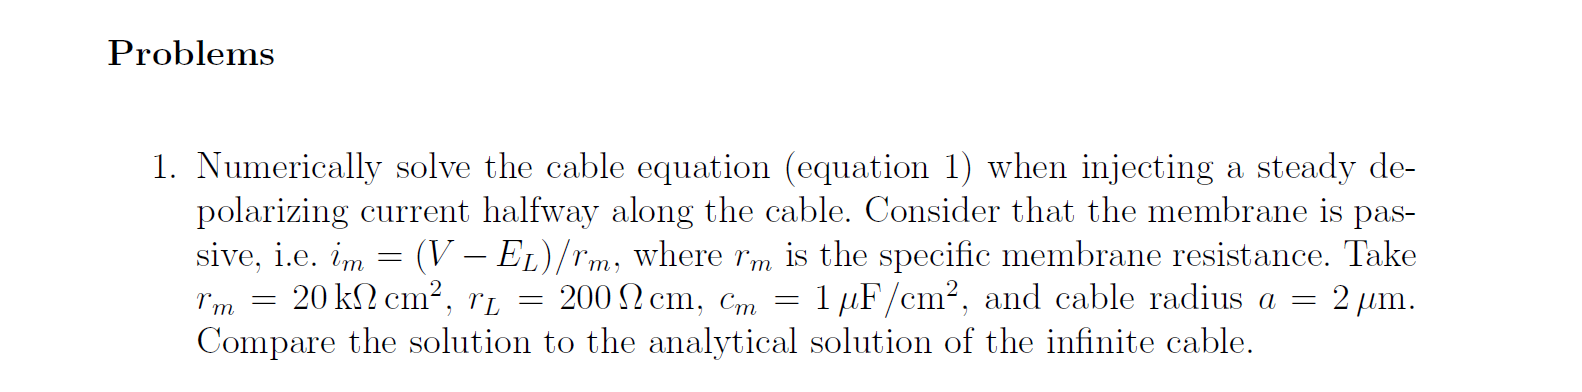

$$
c_{m}\frac{\partial V}{\partial t} = \frac{1}{2ar_{L}}\frac{\partial }{\partial x}(a^{2}\frac{\partial V}{\partial x}) - i_{m} + i_{e}
$$

for cable equation $i_{m} = \bar{g}_{L}(V-E_{L}) = \frac{(V-E_{L})}{r_{m}}$

$$
c_{m}\frac{\partial V}{\partial t} = \frac{1}{2ar_{L}}\frac{\partial }{\partial x}(a^{2}\frac{\partial V}{\partial x}) - \frac{(V-E_{L})}{r_{m}} + i_{e}
$$

considering $V-E_{L} = v$
- ### $\frac{\partial v}{\partial t} = \frac{\partial V}{\partial t} - 0,as E_{L} = constant$
- ### $\frac{\partial }{\partial x}(a^{2}\frac{\partial v}{\partial x}) = \frac{\partial }{\partial x}(a^{2}\frac{\partial V}{\partial x})$

$$
c_{m}\frac{\partial v}{\partial t} = \frac{1}{2ar_{L}}\frac{\partial }{\partial x}(a^{2}\frac{\partial v}{\partial x}) - \frac{v}{r_{m}} + i_{e}
$$

$$
r_{m}c_{m}\frac{\partial v}{\partial t} = \frac{r_{m}}{2ar_{L}}\frac{\partial }{\partial x}(a^{2}\frac{\partial v}{\partial x}) - v + r_{m}i_{e}
$$

$$
r_{m}c_{m}\frac{\partial v}{\partial t} = \frac{r_{m}a}{2r_{L}}\frac{\partial^{2} v}{\partial x^{2}} - v + r_{m}i_{e}
$$

considering
- ### $r_{m}c_{m} = \tau_{m}$
- ### $\frac{r_{m}a}{2r_{L}} = \lambda^{2}$

$$
\tau_{m}\frac{\partial v}{\partial t} = \lambda^{2}\frac{\partial^{2} v}{\partial x^{2}} - v + r_{m}i_{e}
$$

at steady state, $\frac{\partial v}{\partial t} = 0, i.e. v(x,t) => v(x)$.
<br>Therefore $\frac{\partial v}{\partial x} = \frac{dv}{dx}$

$$ 
0 = \lambda^{2}\frac{d^{2} v}{dx^{2}} - v + r_{m}i_{e}
$$

$$
\lambda^{2}\frac{d^{2} v}{d x^{2}} = v - r_{m}i_{e}
$$

In [3]:
t_max = 50e-3
dt = 0.02e-4
t = get_timeline(t_max, dt)

In [4]:
params={
    'E_K':-77e-3, #V
    'E_Na':50e-3, #V
    'g_K':36e-9,  #S
    'g_Na':120e-9, #S
    'E_l':-54.387e-3, #V
    'g_l':0.3e-9, #S
    'r_l':2, #ohm-m
    'r_m':2, #ohm-m^2
    'I_e':5e-7, #A
    'c_m':1e-2, #F/m^2
    'V_thres':-54e-3, #V
    'a':2e-6, #m
    'N':5, #no unit
    'L':2e-6, #m
    'z':1 #no unit
}

In [5]:
lambda_sq = params['r_m'] * params['a'] / (2*params['r_l'])
print(np.sqrt(lambda_sq))

0.001


In [6]:
tau_m = params['r_m']*params['c_m']
print(str(tau_m*1000) + 'ms')

20.0ms


In [7]:
x_max = 3e-3
dx = 1e-6

x = np.arange(-x_max, x_max, dx) ## length shown is 6mm

def exact(lambda_sq, params, x):
    # analytical solution
    mod_x = np.sqrt(x**2);
    r_lambda = params['r_m']/(2*np.pi*params['a']*np.sqrt(lambda_sq))
    return params['I_e']*r_lambda * np.exp(-mod_x/np.sqrt(lambda_sq))/2

In [8]:
##v'' = 1/lambda_sq*(v - i_e*r_m)
##v' = dv
##dv' = f(x,v, params, lambda_sq) = v''

def f(x, v, params, lambda_sq):
    return (1/lambda_sq)*(v - (params['r_m']*params['I_e']))

In [9]:
r_lambda = params['r_m']/(2*np.pi*params['a']*np.sqrt(lambda_sq))


# Boundary Condition
v_0 = params['I_e'] * r_lambda / 2
dv_0 = - v_0/np.sqrt(lambda_sq)

In [10]:
def initialize_arrays(x,v_0, dv_0) :
    v = np.zeros(len(x))
    dv = np.zeros(len(x))
    
    v[0] = v_0
    dv[0] = dv_0

    return v, dv

In [11]:
def euler(f_func, x_max, dx, params, v_0, dv_0, lambda_sq):
    x = np.arange(0, x_max, dx)
    
    v, dv = initialize_arrays(x, v_0, dv_0)

    for i in range(len(x)-1):
        dv[i+1] = dv[i] + f_func(x, v[i], params, lambda_sq)*dx
        v[i+1] = v[i] + dv[i]*dx
    return v

In [12]:
analytical_sol = exact(lambda_sq, params, x)


v = euler(f, x_max, dx, params, v_0, dv_0, lambda_sq)
reversed_arr = v[::-1]
v_whole = np.concatenate((reversed_arr, v), axis=None)

print(max(analytical_sol))

39.788735772958


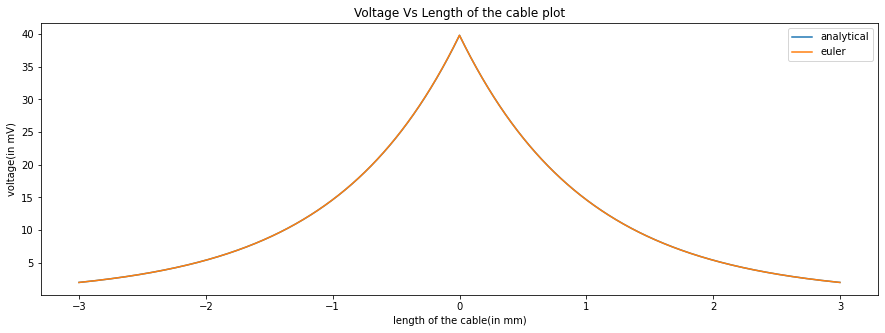

In [13]:
plt.figure(figsize=(15,5))
plt.plot(x*1e3, analytical_sol, label = 'analytical')
plt.plot(x*1e3, v_whole, label='euler')
plt.xlabel('length of the cable(in mm)')
plt.ylabel('voltage(in mV)')
plt.title('Voltage Vs Length of the cable plot')
plt.legend();

**Discussion:** With the injection of an external current at the middle of the cable, there is a spike of voltage with amplitude around 40mV (depending on the external current and the cable properties like the radius, internal resistance and external resistance). As we move further away on either side from the site of current injectin, the voltage decreases exponentially depending on the cable property given by $\lambda$

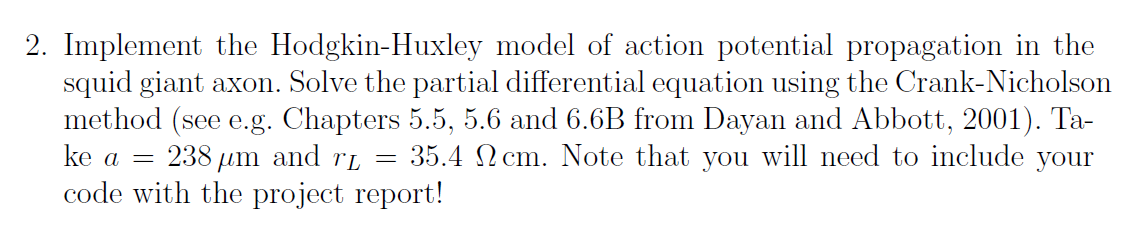

$$
c_{m}\frac{dV_{\mu}}{dt} = -i^{\mu}_{m} + \frac{i^{\mu}_{e}}{A_{\mu}} + g_{\mu,\mu+1}(V_{\mu+1} - V_{\mu}) + g_{\mu,\mu-1}(V_{\mu-1} - V_{\mu})
$$

for including Hodgkin huxley model, active conductances have to be included:
$i_{m} = \bar{g}_{L}(V-E_{L})+\bar{g}_{Na}m^{3}h(V-E_{Na})+\bar{g}_{K}n^{4}(V-E_{K}) = \frac{(V-E_{L})}{r_{m}} +\bar{g}_{Na}m^{3}h(V-E_{Na})+\bar{g}_{K}n^{4}(V-E_{K})$

$$
\frac{dV_{\mu}}{dt} = -\frac{\bar{g}_{L}(V_{\mu}-E_{L})}{c_{m}} - \frac{\bar{g}_{Na}m^{3}h(V-E_{Na})}{c_{m}} - \frac{\bar{g}_{K}n^{4}(V-E_{K})}{c_{m}}+\frac{i^{\mu}_{e}}{c_{m}A_{\mu}} + \frac{g_{\mu,\mu+1}}{c_{m}}(V_{\mu+1} - V_{\mu}) + \frac{g_{\mu,\mu-1}}{c_{m}}(V_{\mu-1} - V_{\mu})\\
\frac{dV_{\mu}}{dt} = -\frac{\bar{g}_{L}V_{\mu}}{c_{m}} - \frac{\bar{g}_{Na}m^{3}h(V_{\mu})}{c_{m}} -\frac{\bar{g}_{K}n^{4}(V_{\mu})}{c_{m}} + \frac{\bar{g}_{L}E_{L}}{c_{m}} +  \frac{\bar{g}_{K}m^{3}h(E_{Na})}{c_{m}} + \frac{\bar{g}_{Na}n^{4}(E_{K})}{c_{m}}+ \frac{i^{\mu}_{e}}{c_{m}A_{\mu}} + \frac{g_{\mu,\mu+1}}{c_{m}}V_{\mu+1} - \frac{g_{\mu,\mu+1}}{c_{m}}V_{\mu} + \frac{g_{\mu,\mu-1}}{c_{m}}V_{\mu-1} - \frac{g_{\mu,\mu-1}}{c_{m}}V_{\mu}\\
\frac{dV_{\mu}}{dt} = \frac{g_{\mu,\mu-1}}{c_{m}}V_{\mu-1} -(\frac{\bar{g}_{L}}{c_{m}}+ \frac{\bar{g}_{Na}m^{3}h}{c_{m}} +\frac{\bar{g}_{K}n^{4}}{c_{m}}+\frac{g_{\mu,\mu+1}}{c_{m}} + \frac{g_{\mu,\mu-1}}{c_{m}})V_{\mu} + \frac{g_{\mu,\mu+1}}{c_{m}}V_{\mu+1} + (\frac{\bar{g}_{L}E_{L}}{c_{m}} + \frac{\bar{g}_{K}m^{3}h(E_{Na})}{c_{m}} + \frac{\bar{g}_{Na}n^{4}(E_{K})}{c_{m}} + \frac{i^{\mu}_{e}}{c_{m}A_{\mu}})\\
$$

Therefore, $$\frac{dV_{\mu}}{dt} = B_{\mu}V_{\mu-1} + C_{\mu}V_{\mu} + D_{\mu}V_{\mu+1} + E_{\mu}$$
where, 
$B_{\mu} = \frac{g_{\mu,\mu-1}}{c_{m}} = \frac{a/(2r_{L}L^{2})}{c_{m}} = \frac{a}{2r_{L}L^{2}c_{m}}\\
C_{\mu} = -(\frac{\bar{g}_{L}}{c_{m}} + \frac{\bar{g}_{Na}m^{3}h}{c_{m}} + \frac{\bar{g}_{K}n^{4}}{c_{m}}+\frac{g_{\mu,\mu+1}}{c_{m}} + \frac{g_{\mu,\mu-1}}{c_{m}}) = -(\frac{\bar{g}_{L}}{c_{m}}  + \frac{\bar{g}_{Na}m^{3}h}{c_{m}} + \frac{\bar{g}_{K}n^{4}}{c_{m}} +\frac{a/(2r_{L}L^{2})}{c_{m}} + \frac{a/(2r_{L}L^{2})}{c_{m}}) = -(\frac{\bar{g}_{L}}{c_{m}}  + \frac{\bar{g}_{Na}m^{3}h}{c_{m}} + \frac{\bar{g}_{K}n^{4}}{c_{m}} + \frac{a}{r_{L}L^{2}c_{m}})\\
D_{\mu} = \frac{g_{\mu,\mu+1}}{c_{m}}= \frac{a/(2r_{L}L^{2})}{c_{m}} = \frac{a}{2r_{L}L^{2}c_{m}}\\
E_{\mu} = (\frac{\bar{g}_{L}E_{L}}{c_{m}} + \frac{\bar{g}_{K}m^{3}h(E_{Na})}{c_{m}} + \frac{\bar{g}_{Na}n^{4}(E_{K})}{c_{m}} + \frac{i^{\mu}_{e}}{c_{m}A_{\mu}})\\
$

Now, $$V_{μ}(t +\Delta t) = V_{μ}(t)+\Delta V_{μ}$$

$\Delta Vμ = (B_{\mu}V_{\mu-1}(t) + C_{\mu}V_{\mu}(t) + D_{\mu}V_{\mu+1}(t) + E_{\mu})\Delta t$

The stability of the method can be improved dramatically by evaluating the membrane potentials on the
right side of equation not at time t, but at a later time t + z$\Delta t$, so that

$$\Delta Vμ = (B_{\mu}V_{\mu-1}(t + z\Delta t) + C_{\mu}V_{\mu}(t+ z\Delta t) + D_{\mu}V_{\mu+1}(t+ z\Delta t) + E_{\mu})\Delta t$$

Considering, $Vμ(t + z\Delta t) ≈ Vμ(t)+ z\Delta Vμ$

We can write 
$$\Delta Vμ = [B_{\mu}(V_{\mu-1}(t) + z\Delta V_{\mu-1}) + C_{\mu}(Vμ(t)+ z\Delta Vμ) + D_{\mu}(V_{\mu+1}(t) + z\Delta V_{\mu+1}) + E_{\mu}]\Delta t \\
\Delta Vμ = B_{\mu}V_{\mu-1}(t)\Delta t + (B_{\mu}z\Delta t)\Delta V_{\mu-1} + C_{\mu}Vμ(t)\Delta t+ (C_{\mu}z\Delta t)\Delta Vμ + D_{\mu}V_{\mu+1}(t)\Delta t + (D_{\mu}z\Delta t)\Delta V_{\mu+1} + E_{\mu}\Delta t \\
\Delta Vμ = (B_{\mu}z\Delta t)\Delta V_{\mu-1} + (C_{\mu}z\Delta t)\Delta Vμ  + (D_{\mu}z\Delta t)\Delta V_{\mu+1} + (B_{\mu}V_{\mu-1}(t) + C_{\mu}Vμ(t)+ D_{\mu}V_{\mu+1}(t) + E_{\mu})\Delta t \\
$$

Therefore, $$\Delta Vμ = b_{\mu}\Delta V_{\mu-1} + c_{\mu}\Delta Vμ  + d_{\mu}\Delta V_{\mu+1} + e_{\mu}$$
where, 
$a_{\mu} = (B_{\mu}z\Delta t) = (\frac{a}{2r_{L}L^{2}c_{m}}z\Delta t)\\
b_{\mu} = (C_{\mu}z\Delta t) = ( -(\frac{\bar{g}_{L}}{c_{m}}  + \frac{\bar{g}_{Na}m^{3}h}{c_{m}} + \frac{\bar{g}_{K}n^{4}}{c_{m}} + \frac{a}{r_{L}L^{2}c_{m}}) z\Delta t)\\
c_{\mu} = (D_{\mu}z\Delta t) = (\frac{a}{2r_{L}L^{2}c_{m}}z\Delta t)\\
d_{\mu} = (B_{\mu}V_{\mu-1}(t) + C_{\mu}Vμ(t)+ D_{\mu}V_{\mu+1}(t) + E_{\mu})\Delta t 
$

We are illustrating the method for a single, nonbranching cable that begins with at compartment μ = 1, so that $a_{1}$ = 0, and ends at compartment μ = N, so $c_{N}$ = 0.

In [14]:
compartments = 1000

#### Co-efficients

In [15]:
initial_values_test = {
    'v0': -65,
    'n0': 0.3177,
    'm0': 0.0529,
    'h0': 0.5961
}
params_node_of_ranvier = {
    'E_K': -77,  # mV
    'E_Na': 50,  # mV
    'g_K': 0.036 * 1e-3 / 1e-6,  # S/m^2
    'g_Na': 1.2 * 1e-3 / 1e-6,  # S/m^2
    'g_l' : 0.003 * 1e-3 / 1e-6, # S/m^2 = 1/r_l
    'E_l': -54.387,  # mV
    'r_l': 35.4e-2,  # ohm-m
    'r_m': 2,  # ohm-m^2
    'I_e': 10e-8,  # A
    'c_m': 1e-2,  # F/m^2
    'a': 238e-6,  # m
    'N': compartments,  # no unit
    'L': 50e-6,  # m
    'z': 0.5,  # no unit
    'current_position': 0,  # no unit
    'isMyelinated': False
}

params_myelin_sheath = {
}

In [16]:
def get_timeline(t_max_get_timeline, dt_get_timeline):
    return np.arange(0, t_max_get_timeline, dt_get_timeline)

### Hodgkin Huxley Equations and factors

In [17]:
def alpha_n(v_alpha_n):
    return 0.01 * (v_alpha_n + 55) / (1 - np.exp(-0.1 * (v_alpha_n + 55)))

def beta_n(v_beta_n):
    return 0.125 * np.exp(-0.0125 * (v_beta_n + 65))

def alpha_m(v_alpha_m):
    return 0.1 * (v_alpha_m + 40) / (1 - np.exp(-0.1 * (v_alpha_m + 40)))

def beta_m(v_beta_m):
    return 4 * np.exp(-0.0556 * (v_beta_m + 65))

def alpha_h(v_alpha_h):
    return 0.07 * np.exp(-0.05 * (v_alpha_h + 65))

def beta_h(v_beta_h):
    return 1 / (1 + np.exp(-0.1 * (v_beta_h + 35)))

def open_close_ion_channel_probability(alpha_func, beta_func, v_prob, x):
    return alpha_func(v_prob) * (1 - x) - beta_func(v_prob) * x  # in 1/ms

In [18]:
def g_k(params_g_k, n_g_k):
    return params_g_k['g_K'] * np.power(n_g_k, 4)  # (S/m^2) *dimensionless = (S/m^2)

def g_na(params_g_na, m_g_na, h_g_na):
    return params_g_na['g_Na'] * np.power(m_g_na, 3) * h_g_na # (S/m^2) * dimensionless * dimensionless = (S/m^2)


### Co-efficients

In [19]:
def g_neighboring(params_g_neigh):
    return params_g_neigh['a'] / (2 * params_g_neigh['r_l'] * params_g_neigh['L'] ** 2)  # m/(ohm-m * m^2) = S/m^2

def B_mu(params_B):
    return g_neighboring(params_B) / params_B['c_m']  # (S/m^2)/(F/m^2) = S/F = 1/sec

def C_mu(params_C, n_C, m_C, h_C, N_neighbors):
    term1 = params_C['g_l']/params_C['c_m'] #1 / (params_C['c_m'] * params_C['r_m'])  # 1/(F/m^2 * ohm-m^2) = 1/(F-ohm) = 1/sec
    term2 = g_k(params_C, n_C) / params_C['c_m']  # (S/m^2)/(F/m^2) = S/F = 1/sec
    term3 = g_na(params_C, m_C, h_C) / params_C['c_m']  # (S/m^2)/(F/m^2) = S/F = 1/sec
    term4 = N_neighbors * B_mu(params_C)  # (S/m^2)/(F/m^2) = S/F = 1/sec
    return -(term1 + term2 + term3 + term4)  # 1/sec

def D_mu(params_D):
    return g_neighboring(params_D) / params_D['c_m'] # (S/m^2)/(F/m^2) = S/F = 1/sec

def E_mu(params_E, I_e_E, A_mu_E, n_E, m_E, h_E):
    term1 = params_E['E_l'] * params_E['g_l'] / (params_E['c_m']) #params_E['E_l'] / (params_E['c_m'] * params_E['r_m'])  # mV/(F/m^2 * ohm-m^2) = mV/sec
    term2 = g_k(params_E, n_E) * params_E['E_K'] / params_E['c_m']  # (S/m^2) * mV / (F/m^2) = mV * S/F = mV/sec
    term3 = g_na(params_E, m_E, h_E) * params_E['E_Na'] / params_E['c_m']  # (S/m^2) * mV / (F/m^2) = mV * S/F = mV/sec
    term4 = (I_e_E / (params_E['c_m'] * A_mu_E)) * 1e3  # (A/(F/m^2 * m^2))*1e3 = (A/F)*1e3 = ((V/ohm)/(sec/Ohm))*1e3 = (V/sec) *1e3 = mV/sec
    return term1 + term2 + term3 + term4  # mV/sec

In [20]:
def a_mu(params_a, dt_a): # dt_a in sec # B_mu(params_a) in 1/seconds
    return B_mu(params_a) * params_a['z'] * dt_a  # dimensionless

def b_mu(params_b, n_b, m_b, h_b, dt_b, Nn): # params_b, # n_b, m_b, h_b are dimensionless, # dt_b in sec
    return C_mu(params_b, n_b, m_b, h_b, Nn) * params_b['z'] * dt_b  # 1/sec * dimensionless * sec  = dimensionless

def c_mu(params_c, dt_c): # dt_c in s # D_mu(params_c) in 1/seconds
    return D_mu(params_c) * params_c['z'] * dt_c  # dimensionless

def d_mu(params_d, mu_d, v_d, I_e_d, A_mu_d, n_d, m_d, h_d, dt_d): # params_d,# mu_d, n_d, m_d, h_d dimensionless, # v_d in mV, # I_e_d in A, # A_mu_d in m^2, # dt_d in sec
    d = 0
    Nn = 2
    if mu_d > 0:
        d = d + B_mu(params_d) * v_d[mu_d - 1]  # 1/sec * mV = mV/sec
    if mu_d < (params_d['N'] - 1):
        d = d + D_mu(params_d) * v_d[mu_d + 1]  # 1/sec * mV = mV/sec
    if mu_d==0 or mu_d == (params_d['N'] - 1):
        Nn = 1
    d = d + C_mu(params_d, n_d, m_d, h_d, Nn) * v_d[mu_d]  # 1/sec * mV = mV/sec
    d = d + E_mu(params_d, I_e_d, A_mu_d, n_d, m_d, h_d)  # mV/sec
    return d * dt_d  # mV/sec * sec =  mV

In [21]:
def surface_area(params_surf_area):
    return np.ones(params_surf_area['N']) * (2 * np.pi * params_surf_area['a'] * params_surf_area['L']) # m*m

In [22]:
def ext_applied_current(params_ext_i, t_ext_i):   
    i_e = np.zeros(shape=(len(t_ext_i), params_ext_i['N']))
    i_e[:, params_ext_i['current_position']] = params_ext_i['I_e']
    key = 'current_position2'
    if (key in params_ext_i) and  (params_ext_i['current_position2'] != 0) :
        i_e[:, params_ext_i['current_position2']] = params_ext_i['I_e']
    return i_e # in Amp

In [23]:
def initialize_arrays_cn(t, no_of_compartments_init_array, initial_values_init_array):
    n = np.zeros(shape=(len(t), no_of_compartments_init_array))
    m = np.zeros(shape=(len(t), no_of_compartments_init_array))
    h = np.zeros(shape=(len(t), no_of_compartments_init_array))
    v = np.zeros(shape=(len(t), no_of_compartments_init_array))
    
    n.fill(initial_values_init_array['n0'])
    m.fill(initial_values_init_array['m0'])
    h.fill(initial_values_init_array['h0'])
    v.fill(initial_values_init_array['v0'])

    return n, m, h, v

In [24]:
def get_axon(common_params_get_axon):
    axon = np.zeros(common_params_get_axon['N'])
    if common_params_get_axon['isMyelinated'] :
        axon.fill(1)
        for i in range(1, common_params_get_axon['no_of_node_of_ranvier']+1):
            axon[i * (common_params_get_axon['no_of_myelinated_compartments']+1) - 1] = 0
        axon[0] = 0
    return axon

In [25]:
def calculating_constant_co_eff(params_node_of_ranvier_const_coeff, params_myelin_sheath_const_coeff, axon_const_coeff, dt_const_coeff):
    # dt_const_coeff in s
    a = np.ones(params_node_of_ranvier_const_coeff['N'])
    c = np.ones(params_node_of_ranvier_const_coeff['N'])
    
    a_mu_unmyelin = a_mu(params_node_of_ranvier_const_coeff, dt_const_coeff)
    c_mu_unmyelin = c_mu(params_node_of_ranvier_const_coeff, dt_const_coeff)
    
    if 1 in axon_const_coeff:
        a_mu_myelin = a_mu(params_myelin_sheath_const_coeff, dt_const_coeff)
        c_mu_myelin = c_mu(params_myelin_sheath_const_coeff, dt_const_coeff)
    
    for i in range(params_node_of_ranvier_const_coeff['N']):
        if axon_const_coeff[i] == 0 :
            a[i] = a_mu_unmyelin
            c[i] = c_mu_unmyelin
        else:
            a[i] = a_mu_myelin
            c[i] = c_mu_myelin

    a[0] = 0  # first compartment
    c[-1] = 0  # last compartment
    
    return a, c

In [26]:
def calculating_all_b_d_dash(a_for_all_b_d_dash, c_for_all_b_d_dash, params_node_of_ranvier_for_all_b_d_dash,
                             params_myelin_sheath_for_all_b_d_dash, axon_for_all_b_d_dash,
                             v_for_all_b_d_dash, i_e_for_all_b_d_dash, area_mu_for_all_b_d_dash, 
                             n_for_all_b_d_dash, m_for_all_b_d_dash, h_for_all_b_d_dash, dt_for_all_b_d_dash):
    
    # v_for_all_b_d_dash in mV,
    # i_e_for_all_b_d_dash in A,
    # n_for_all_b_d_dash, m_for_all_b_d_dash, h_for_all_b_d_dash, a_for_all_b_d_dash, c_for_all_b_d_dash  dimensionless,
    # params_for_all_b_d_dash,
    # area_mu_for_all_b_d_dash in m^2,
    # dt_for_all_b_d_dash in sec
    
    b = np.zeros(params_node_of_ranvier_for_all_b_d_dash['N'])
    d = np.zeros(params_node_of_ranvier_for_all_b_d_dash['N'])
    b_dash = np.zeros(params_node_of_ranvier_for_all_b_d_dash['N'])
    d_dash = np.zeros(params_node_of_ranvier_for_all_b_d_dash['N'])
    
    
    for mu in range(params_node_of_ranvier_for_all_b_d_dash['N']):
        if mu == 0 or mu == params_node_of_ranvier_for_all_b_d_dash['N'] - 1:
            Nn = 1
        else:
            Nn = 2
            
        if axon_for_all_b_d_dash[mu] == 0:
            params_for_all_b_d_dash = params_node_of_ranvier_for_all_b_d_dash
        else:
            params_for_all_b_d_dash = params_myelin_sheath_for_all_b_d_dash
            
        b[mu] = b_mu(params_for_all_b_d_dash, n_for_all_b_d_dash[mu], m_for_all_b_d_dash[mu], h_for_all_b_d_dash[mu], dt_for_all_b_d_dash, Nn)  # dimensionless
        d[mu] = d_mu(params_for_all_b_d_dash, mu, v_for_all_b_d_dash, i_e_for_all_b_d_dash[mu], area_mu_for_all_b_d_dash[mu], n_for_all_b_d_dash[mu], m_for_all_b_d_dash[mu], h_for_all_b_d_dash[mu], dt_for_all_b_d_dash)  # mV
        
        
        if mu == 0:
            b_dash[0] = b[0]  # dimensionless
            d_dash[0] = d[0]  # mV
        else:
            b_dash[mu] = b[mu] + (a_for_all_b_d_dash[mu] * c_for_all_b_d_dash[mu-1] / (1 - b_dash[mu-1])) # dimensionless + (dimensionless * dimensionless / (1 - dimensionless)) = dimensionless
            d_dash[mu] = d[mu] + (a_for_all_b_d_dash[mu] * d_dash[mu-1] / (1 - b_dash[mu-1])) # mV + (dimensionless * mV / (1 - dimensionless)) = mV
        
    return b_dash, d_dash  #dimensionless, mV

In [27]:
def del_v_mu_minus_1(c_mu_minus_1, del_v_mu, d_dash_mu_minus_1, b_dash_mu_minus_1):
    return (c_mu_minus_1 * del_v_mu + d_dash_mu_minus_1) / (1 - b_dash_mu_minus_1)  # (dimensionless * mV + mV)/dimensionless = mV


In [28]:
def calculating_all_del_v(v_each_t, i_e_each_t, n_each_t, m_each_t, h_each_t, params_node_of_ranvier_each_t, params_myelin_sheath_each_t, axon_each_t, a_each_t, c_each_t,
                          area_mu_each_t, dt_each_t):
    # v_each_t in mV,
    # i_e_each_t in A,
    # n_each_t, m_each_t, h_each_t, a_each_t, c_each_t dimensionless,
    # params_each_t,
    # area_mu_each_t in m^2,
    # dt_each_t in sec
    
    b_dash, d_dash = calculating_all_b_d_dash(a_each_t, c_each_t, params_node_of_ranvier_each_t, params_myelin_sheath_each_t, axon_each_t, v_each_t, i_e_each_t, area_mu_each_t, n_each_t, m_each_t, h_each_t, dt_each_t)
    
    del_v = np.zeros(params_node_of_ranvier_each_t['N'])
    del_v[-1] = d_dash[-1] / (1 - b_dash[-1])  # mV/dimensionless =  mV
    
    for mu in reversed(range(params_node_of_ranvier_each_t['N'])):
        if mu > 0:
            del_v[mu - 1] = del_v_mu_minus_1(c_each_t[mu - 1], del_v[mu], d_dash[mu - 1], b_dash[mu - 1])
    return del_v  # should be in mV

In [29]:
def euler_cn(f_func, t_max_euler, dt_euler, params_node_of_ranvier_euler, params_myelin_sheath_euler, initial_values_euler):
    # dt_euler in s
    t_range = get_timeline(t_max_euler, dt_euler)
    
    axon = get_axon(params_node_of_ranvier_euler)

    n, m, h, v = initialize_arrays_cn(t_range, params_node_of_ranvier_euler['N'], initial_values_euler)  # n, m, h are dimensionless
    # and  v in mV

    i_e = ext_applied_current(params_node_of_ranvier_euler, t_range)  # in A

    a, c = calculating_constant_co_eff(params_node_of_ranvier_euler, params_myelin_sheath_euler, axon, dt_euler)  # are dimensionless

    area_mu = surface_area(params_node_of_ranvier_euler)  # in m^2
    
    for t in range(len(t_range) - 1):
        n[t + 1] = n[t] + open_close_ion_channel_probability(alpha_n, beta_n, v[t], n[t]) * (dt_euler * 1e3)  # dimensionless + (1/ms * ms ) = dimensionless
        m[t + 1] = m[t] + open_close_ion_channel_probability(alpha_m, beta_m, v[t], m[t]) * (dt_euler * 1e3)  # dimensionless + (1/ms * ms ) = dimensionless
        h[t + 1] = h[t] + open_close_ion_channel_probability(alpha_h, beta_h, v[t], h[t]) * (dt_euler * 1e3)  # dimensionless + (1/ms * ms ) = dimensionless

        v[t + 1] = v[t] + f_func(v[t], i_e[t], n[t], m[t], h[t], params_node_of_ranvier_euler, params_myelin_sheath_euler, axon, a, c, area_mu, dt_euler)  # mV + mV = mV

    return t_range, v, n, m, h


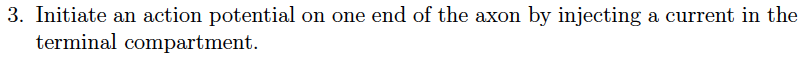

In [30]:
dt_test = 1e-5  # in ms
t_max_test = 70e-3  # (in ms) 

params_node_of_ranvier['current_position'] = 0

In [31]:
t_cn, v_cn, n_cn, m_cn, h_cn = euler_cn(calculating_all_del_v, t_max_test, dt_test, params_node_of_ranvier, params_myelin_sheath, initial_values_test)


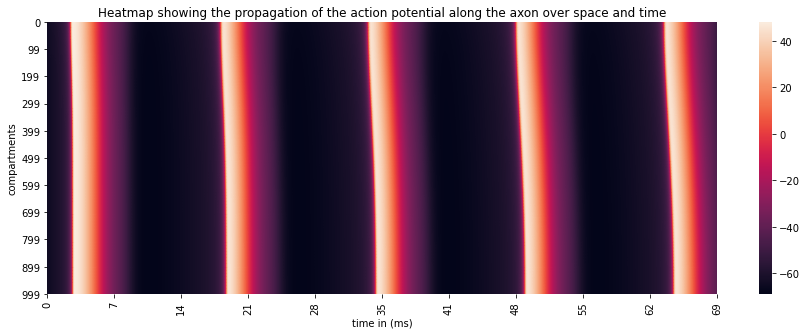

In [32]:
plt.figure(figsize=(15,5))

# y-axis label
y_ticks_num = 11
depth_list =  np.arange(0,params_node_of_ranvier['N'],1)
yticks = np.linspace(0, params_node_of_ranvier['N'] - 1, y_ticks_num, dtype=np.int)
yticklabels = [depth_list[idx] for idx in yticks]

# x-axis label
x_ticks_num = 11
# depth_list =  np.arange(0,params_node_of_ranvier['N'],1)
xticks = np.linspace(1, len(t_cn) - 1, x_ticks_num, dtype=np.int)
xticklabels = [int(t_cn[idx]* 1e3) for idx in xticks]


v_cn_transp = np.transpose(v_cn)
ax = sns.heatmap(v_cn_transp, yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.xlabel('time in (ms)')
plt.ylabel('compartments')
plt.title('Heatmap showing the propagation of the action potential along the axon over space and time')
plt.show()

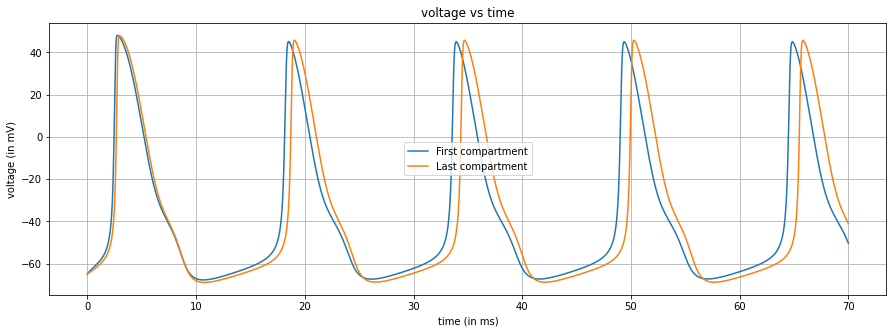

In [33]:
plt.figure(figsize=(15,5))

plt.plot(t_cn*1e3,v_cn[:,0], label='First compartment')
plt.plot(t_cn*1e3,v_cn[:,999], label='Last compartment')
plt.xlabel('time (in ms)')
plt.ylabel('voltage (in mV)')
plt.title('voltage vs time')
plt.grid()
plt.legend();

In [34]:
first_rand_comp = 0
second_rand_comp = v_cn.shape[1]-1

t1_rad = (np.argmax(v_cn[int(40e-3/dt_test):int(60e-3/dt_test),first_rand_comp])+int(40e-3/dt_test))* dt_test 
t2_rad = (np.argmax(v_cn[int(40e-3/dt_test):int(60e-3/dt_test),second_rand_comp])+int(40e-3/dt_test))* dt_test 

velocity_cn = (second_rand_comp-first_rand_comp)* params_node_of_ranvier['L'] /(t2_rad-t1_rad)
print("Velocity of action potential propagation: %.2f m/s" %velocity_cn)

Velocity of action potential propagation: 56.12 m/s


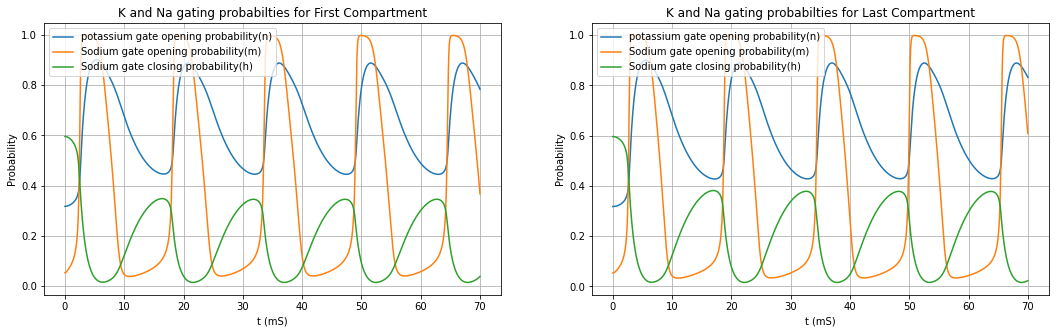

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

axes[0].plot(t_cn*1e3,n_cn[:,0], label='potassium gate opening probability(n)')
axes[0].plot(t_cn*1e3,m_cn[:,0], label='Sodium gate opening probability(m)')
axes[0].plot(t_cn*1e3,h_cn[:,0], label='Sodium gate closing probability(h)')
axes[0].set_title('K and Na gating probabilties for First Compartment')
axes[0].set_ylabel('Probability')
axes[0].set_xlabel('t (mS)')
axes[0].grid()
axes[0].legend()

axes[1].plot(t_cn*1e3,n_cn[:,999], label='potassium gate opening probability(n)')
axes[1].plot(t_cn*1e3,m_cn[:,999], label='Sodium gate opening probability(m)')
axes[1].plot(t_cn*1e3,h_cn[:,999], label='Sodium gate closing probability(h)')
axes[1].set_title('K and Na gating probabilties for Last Compartment')
axes[1].set_ylabel('Probability')
axes[1].set_xlabel('t (mS)')
axes[1].grid()
axes[1].legend();


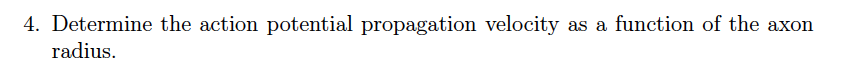

In [36]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 21:03:12


In [37]:
params_node_of_ranvier['N'] = 1000
params_node_of_ranvier['L'] = 50e-6
radius_range = np.arange(25e-6, 238e-6, 10e-6)
# length_range= np.linspace(50e-6, 40e-6, len(radius_range))
velocity_arr = np.zeros(len(radius_range))


for i in range(len(radius_range)):
    params_node_of_ranvier['a'] = radius_range[i]
    t_rad, v_rad, _, _, _ = euler_cn(calculating_all_del_v, t_max_test, dt_test, params_node_of_ranvier, params_myelin_sheath,
                                                  initial_values_test)

    first_rand_comp = 0
    second_rand_comp = v_rad.shape[1]-1

    t1_rad = (np.argmax(v_rad[int(40e-3/dt_test):int(60e-3/dt_test),first_rand_comp])+int(40e-3/dt_test))* dt_test 
    t2_rad = (np.argmax(v_rad[int(40e-3/dt_test):int(60e-3/dt_test),second_rand_comp])+int(40e-3/dt_test))* dt_test

    velocity_arr[i] = (second_rand_comp-first_rand_comp)* params_node_of_ranvier['L'] /(t2_rad-t1_rad)




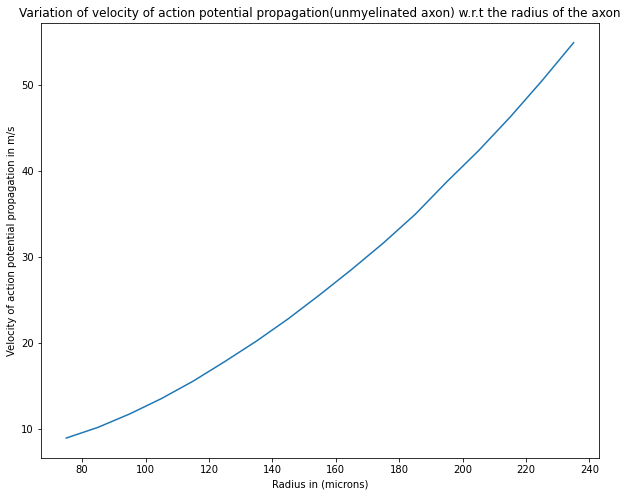

In [38]:
plt.figure(figsize=(10,8))
plt.plot(radius_range[5:]*1000000, velocity_arr[5:])
plt.title('Variation of velocity of action potential propagation(unmyelinated axon) w.r.t the radius of the axon')
plt.xlabel('Radius in (microns)')
plt.ylabel('Velocity of action potential propagation in m/s')
plt.show()

In [39]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:39:48


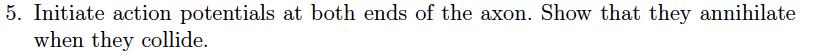

In [40]:
params_node_of_ranvier['N'] = 1000
params_node_of_ranvier['current_position2'] = params_node_of_ranvier['N']-1
params_node_of_ranvier['a'] = 238e-6
params_node_of_ranvier['L'] = 50e-6
params_node_of_ranvier['isMyelinated'] =  False
params_node_of_ranvier['I_e'] = 5e-7

dt_test = 1e-5  # in ms
t_max_test = 10e-3  # (in ms) 

t_ann, v_ann, n_ann, m_ann, h_ann = euler_cn(calculating_all_del_v, t_max_test, dt_test, params_node_of_ranvier, params_myelin_sheath,
                                                  initial_values_test)


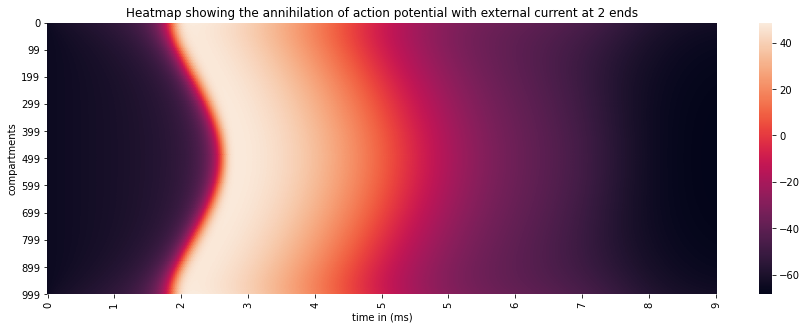

In [41]:
plt.figure(figsize=(15,5))

# y-axis label
y_ticks_num = 11
depth_list =  np.arange(0,params_node_of_ranvier['N'],1)
yticks = np.linspace(0, params_node_of_ranvier['N'] - 1, y_ticks_num, dtype=np.int)
yticklabels = [depth_list[idx] for idx in yticks]

# x-axis label
x_ticks_num = 11
# depth_list =  np.arange(0,params_node_of_ranvier['N'],1)
xticks = np.linspace(1, len(t_ann) - 1, x_ticks_num, dtype=np.int)
xticklabels = [int(t_ann[idx]* 1e3) for idx in xticks]


v_ann_transp = np.transpose(v_ann)
ax = sns.heatmap(v_ann_transp, yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.xlabel('time in (ms)')
plt.ylabel('compartments')
plt.title('Heatmap showing the annihilation of action potential with external current at 2 ends')
plt.show()

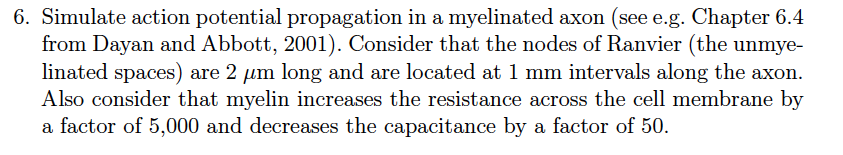

In [42]:
no_of_node_of_ranvier_considered = 100
node_of_ranvier_length = 2e-6
interval_between_node_of_ranvier_length = 1e-3
no_of_myelinated_compartment = int(interval_between_node_of_ranvier_length/node_of_ranvier_length)
compartments = no_of_node_of_ranvier_considered*no_of_myelinated_compartment + no_of_node_of_ranvier_considered

In [43]:
params_node_of_ranvier['isMyelinated'] = True
params_node_of_ranvier['N'] = compartments
params_node_of_ranvier['no_of_node_of_ranvier'] = no_of_node_of_ranvier_considered
params_node_of_ranvier['no_of_myelinated_compartments'] = no_of_myelinated_compartment
params_node_of_ranvier['L'] = node_of_ranvier_length
params_node_of_ranvier['current_position2'] = 0
params_node_of_ranvier['I_e'] = 1e-12
params_node_of_ranvier['a'] = 1e-6

params_myelin_sheath = {
    'E_l': -54.387,  # mV
    'r_l': 35.4e-2,  # ohm-m
    'I_e': 1e-12,  # A
    'a': 9e-6,  # m
    'N': compartments,  # no unit
    'L': node_of_ranvier_length,  # m
    'z': 0.5,  # no unit
    'current_position': 0,  # no unit
    'isMyelinated': True
}

params_myelin_sheath['E_K'] = 0
params_myelin_sheath['E_Na'] = 0
params_myelin_sheath['g_K'] = 0
params_myelin_sheath['g_Na'] = 0
params_myelin_sheath['g_l'] = 0.003 * 1e-3 / (5000*1e-6)
params_myelin_sheath['r_m'] = 2*5000
params_myelin_sheath['c_m'] = 1e-2/50

print(f'{params_node_of_ranvier =}')
print(f'{params_myelin_sheath =}')

params_node_of_ranvier ={'E_K': -77, 'E_Na': 50, 'g_K': 36.0, 'g_Na': 1200.0, 'g_l': 3.0, 'E_l': -54.387, 'r_l': 0.354, 'r_m': 2, 'I_e': 1e-12, 'c_m': 0.01, 'a': 1e-06, 'N': 50100, 'L': 2e-06, 'z': 0.5, 'current_position': 0, 'isMyelinated': True, 'current_position2': 0, 'no_of_node_of_ranvier': 100, 'no_of_myelinated_compartments': 500}
params_myelin_sheath ={'E_l': -54.387, 'r_l': 0.354, 'I_e': 1e-12, 'a': 9e-06, 'N': 50100, 'L': 2e-06, 'z': 0.5, 'current_position': 0, 'isMyelinated': True, 'E_K': 0, 'E_Na': 0, 'g_K': 0, 'g_Na': 0, 'g_l': 0.0006000000000000001, 'r_m': 10000, 'c_m': 0.0002}


In [44]:
dt_test = 9e-6
t_max_test = 25e-3
t_myelin, v_myelin, n_myelin, m_myelin, h_myelin = euler_cn(calculating_all_del_v, t_max_test, dt_test,params_node_of_ranvier, params_myelin_sheath, initial_values_test)


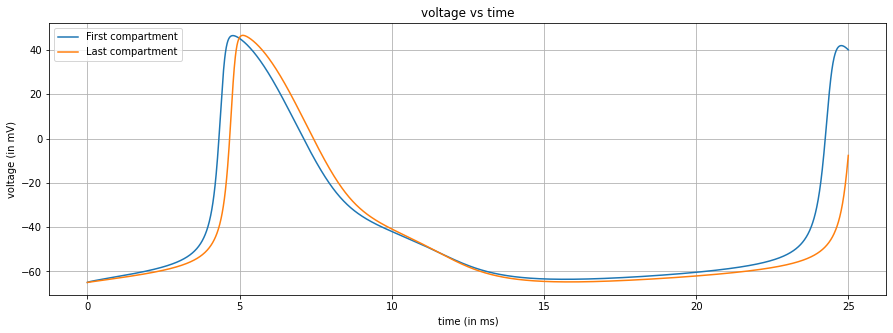

In [45]:
plt.figure(figsize=(15,5))

plt.plot(t_myelin*1e3,v_myelin[:,0], label='First compartment')
plt.plot(t_myelin*1e3,v_myelin[:,compartments-1], label='Last compartment')
plt.xlabel('time (in ms)')
plt.ylabel('voltage (in mV)')
plt.title('voltage vs time')
plt.grid()
plt.legend();

In [46]:
first_rand_comp = 0
second_rand_comp = v_myelin.shape[1]-1

t1_rad = (np.argmax(v_myelin[:,first_rand_comp]))* dt_test 
t2_rad = (np.argmax(v_myelin[:,second_rand_comp]))* dt_test 

# print((np.argmax(v_cn[int(50e-3/dt_test):,first_rand_comp])+(50e-3/dt_test))* dt_test) 
velocity = (second_rand_comp-first_rand_comp)* params_node_of_ranvier['L'] /(t2_rad-t1_rad)
print("Velocity of action potential propagation %.2f m/s"%velocity)

Velocity of action potential propagation 300.89 m/s
